In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy as sy
from specutils.manipulation import FluxConservingResampler

Total difference between ideal and filtered spectrum: 0.04724397185562653
[113 259 366 510 614 762 863] [2.1509165 -2.42547310e-16j 2.13860764-2.42262968e-16j
 3.1833137 -1.16880463e-16j 2.05571681-1.34685323e-16j
 3.2856132 -1.27557967e-16j 2.16364755-3.35797266e-17j
 3.18862033-6.04447856e-17j]


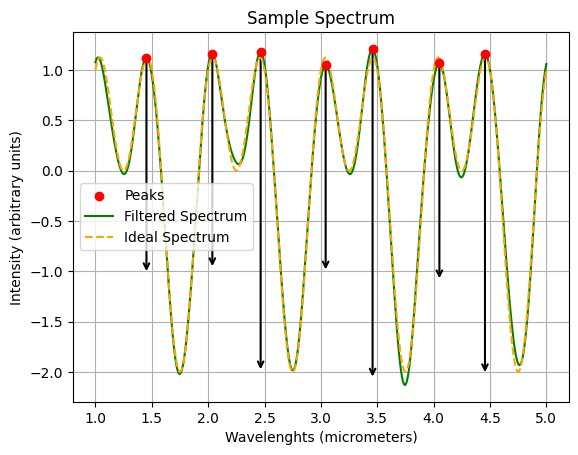

In [ ]:
    
Wavelenghts= np.linspace(1, 5, 1000) #wavelenghts in micrometers
Spectrum = np.sin(2*np.pi *Wavelenghts) + np.cos(4*np.pi *Wavelenghts) + 0.3 * np.random.normal(size=Wavelenghts.size)
ideal = np.sin(2*np.pi *Wavelenghts) + np.cos(4*np.pi *Wavelenghts)
fig = plt.figure()

def Low_pass_filter(signal, x_axis):
    """Use a low pass filter to try and remove high frequency noise from the signal."""
    cutoff_frequency = 5  # Define cutoff frequency for low-pass filter
    Frequencies = np.fft.fftfreq(len(x_axis), d=(x_axis[1]-x_axis[0]))
    Spectrum_Fourier = np.fft.fft(signal)
    mask = np.abs(Frequencies) < cutoff_frequency  # Low-pass filter cutoff frequency

    Filtered_Spectrum_Fourier = Spectrum_Fourier*mask
    Filtered_Spectrum = np.fft.ifft(Filtered_Spectrum_Fourier)
    total_difference = np.sum(np.abs(ideal - Filtered_Spectrum))/ len(ideal)
    print(f"Total difference between ideal and filtered spectrum: {total_difference}")
    return Filtered_Spectrum



Signal_filtered = Low_pass_filter(Spectrum, Wavelenghts)
peaks , heights= find_peaks_and_heights(Signal_filtered, Wavelenghts)
print(peaks, heights)

plt.scatter(Wavelenghts[peaks], Signal_filtered[peaks], color='red', label='Peaks', zorder= 4)
#plt.plot(Wavelenghts, Spectrum, label='Spectrum', zorder= 1)
plt.plot(Wavelenghts, Signal_filtered, label='Filtered Spectrum', color='green', zorder= 2)
plt.plot(Wavelenghts, ideal, label='Ideal Spectrum', color='orange', linestyle='--', zorder= 3)
plt.legend()
plt.xlabel("Wavelenghts (micrometers)")         
plt.ylabel("Intensity (arbitrary units)")
plt.title("Sample Spectrum")
plt.grid()
plt.show()






[0.0778628  0.25979637 0.23142545 0.76026027 0.55768162 0.27294015
 0.13351213 0.48537852 0.31586047 0.91128723]


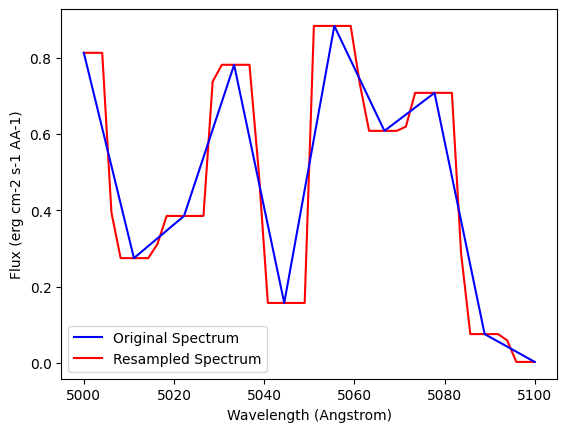

In [58]:
import numpy as np
import astropy.units as u
from specutils import Spectrum
from specutils.manipulation import FluxConservingResampler
import matplotlib.pyplot as plt
print(np.random.random(10))
wave = np.linspace(5000, 5100, 10) * u.AA
#flux = np.random.random(10) * u.Unit("erg cm-2 s-1 AA-1")
flux = np.array([0.81306158, 0.27469256, 0.38526647, 0.78165338, 0.15717256, 0.88356331,
 0.60842991, 0.70807226, 0.07552976, 0.00253725]) * u.Unit("erg cm-2 s-1 AA-1")
spec = Spectrum(spectral_axis=wave, flux=flux)
new_wave = np.linspace(5000, 5100, 50) * u.AA
resampler = FluxConservingResampler()
new_spec = resampler(spec, new_wave)

plt.plot(spec.spectral_axis, spec.flux, zorder= 2, label='Original Spectrum', color='blue')
plt.xlabel("Wavelength (Angstrom)") 
plt.plot(new_spec.spectral_axis, new_spec.flux, label='Resampled Spectrum', color='red', zorder= 1)
plt.ylabel("Flux (erg cm-2 s-1 AA-1)")
plt.legend()
plt.show()

C:\Users\Miles\AppData\Local\Temp\ipykernel_23256\2563088682.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


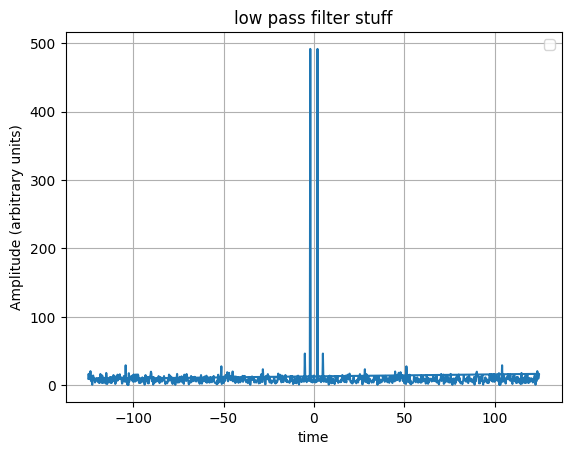

In [77]:
Wavelenghts= np.linspace(1, 5, 1000) #wavelenghts in micrometers
Spectrum = 0.1*np.sin(5*(2*np.pi) *Wavelenghts) + np.cos(2*(2*np.pi) *Wavelenghts) + 0.3 * np.random.normal(size=Wavelenghts.size)
ideal = np.sin(5*(2*np.pi) *Wavelenghts) + np.cos(2*(2*np.pi) *Wavelenghts)
Frequencies = np.fft.fftfreq(len(Wavelenghts), d=(Wavelenghts[1]-Wavelenghts[0]))
Spectrum_Fourier = np.fft.fft(Spectrum)

plt.plot(Frequencies, np.abs(Spectrum_Fourier))
#plt.ylim(0,50)
#plt.xlim(0,10)
plt.legend()
plt.xlabel("time") 
plt.ylabel("Amplitude (arbitrary units)")
plt.title("low pass filter stuff")
plt.grid()
plt.show()